In [20]:
import sys

In [21]:
sys.version

'3.6.9 (default, Apr 20 2021, 10:09:27) \n[GCC 9.3.0]'

In [22]:
%matplotlib  inline
import os
from pprint import pprint
import matplotlib.pyplot as plt
import sciunit
import sciunit.scores
import neuronunit
from neuronunit.models.reduced import ReducedModel
from neuronunit.capabilities import ProducesSpikes

In [23]:
# Assumes imported neuronunit is from source, e.g. pip install -e
path = os.path.join(neuronunit.__path__[0],'models/NeuroML2/LEMS_2007One.xml')
# Instantiate three identical models
models = [ReducedModel(path, name='Izhikevich_{}'.format(i), backend='jNeuroML') for i in range(5)]

In [24]:
# Change the parameters of the second model
models[1].set_attrs(**{'izhikevich2007Cell':{'a':'0.04 per_ms'}})
models[1].name = 'Izhikevich_another_test'

TypeError: set_attrs() takes 1 positional argument but 2 were given

/opt/projects/metacell/scidash/scidash/venv/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


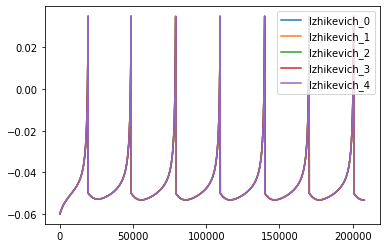

In [25]:
for model in models:
    plt.plot(model.get_membrane_potential(),label=model)
plt.legend();

In [7]:
# A new M2M test which will compare the equality of spike counts across models
class TestFromJupyterNotebook(sciunit.Test):
    required_capabilities = (ProducesSpikes,)
    score_type = sciunit.scores.ZScore
    url = "http://testurl.data.com"
    def generate_prediction(self,model):
        count = model.get_spike_count()
        return count

In [8]:
test = TestFromJupyterNotebook(observation={'mean':8, 'std':3, 'url':'http://somewhereelse.thathasdata.com'})

In [9]:
s = test.judge(models)

In [10]:
s

,TestFromJupyterNotebook
Izhikevich_0,Z = -0.33
Izhikevich_another_test,Z = 0.00
Izhikevich_2,Z = -0.33
Izhikevich_3,Z = -0.33
Izhikevich_4,Z = -0.33


In [11]:
%time x = test.json(string=False, add_props=True)
pprint(x)

CPU times: user 261 µs, sys: 36 µs, total: 297 µs
Wall time: 303 µs
{'_class': {'name': 'TestFromJupyterNotebook',
            'url': 'http://testurl.data.com'},
 '_id': 4842193304,
 'description': None,
 'hash': 'd5ea8ad7d24c391af598b4dc3f49cfb5d6dec2403f36ffdb9459d222',
 'name': 'TestFromJupyterNotebook',
 'observation': {'mean': 8,
                 'std': 3,
                 'url': 'http://somewhereelse.thathasdata.com'},
 'remote_url': None,
 'unpicklable': [],
 'verbose': 1,
 'version': None}


In [12]:
def check_url(x):
    if not x.json(string=False).get('url'):
        print("Model has no associated url; please set the url attribute of the model")
check_url(models[0])

Model has no associated url; please set the url attribute of the model


In [13]:
# How do you want your GitHub URLs?  
lems_url = ("https://github.com/scidash/neuronunit/blob/master/neuronunit/"
            "models/NeuroML2/LEMS_2007One.xml")
models[0]._url = lems_url
models[1]._url = lems_url
models[2]._url = lems_url
models[3]._url = lems_url
models[4]._url = lems_url

In [14]:
check_url(models[0])

Model has no associated url; please set the url attribute of the model


In [15]:
# Has fewer attributes because most of them came from the LEMS file so those are assumed
# to still be the values in memory.  If we need to extract these then I need to find a
# way to read them from the file; however, there may be no general way to do so for all
# LEMS files, and certainly not for all possible models.  
%time x = models[0].json(string=False)
pprint(x)

CPU times: user 67 µs, sys: 1 µs, total: 68 µs
Wall time: 72 µs
{'attrs': {}, 'backend': 'jNeuroML', 'name': 'Izhikevich_0', 'run_params': {}}


In [16]:
# Has more attributes because some of the original attributes from the LEMS file 
# were replaced with new ones in this session
%time x = models[1].json(string=False)
pprint(x)

CPU times: user 65 µs, sys: 0 ns, total: 65 µs
Wall time: 69.1 µs
{'attrs': {'izhikevich2007Cell': {'a': '0.04 per_ms'}},
 'backend': 'jNeuroML',
 'name': 'Izhikevich_another_test',
 'run_params': {}}


In [17]:
# Select one score from the score matrix
score = s['Izhikevich_another_test','TestFromJupyterNotebook']
%time x = score.json(string=False, add_props=True)
pprint(x)

CPU times: user 87.5 ms, sys: 43.5 ms, total: 131 ms
Wall time: 178 ms
{'_class': {'name': 'ZScore', 'url': 'http://github.com/scidash/sciunit.git'},
 '_id': 4698557800,
 'hash': '05195d51ec8c413a5edecab8c22022c35bb1fd2995e09acb4416d06e',
 'model': {'_class': {'name': 'ReducedModel',
                      'url': 'https://github.com/scidash/neuronunit/blob/master/neuronunit/models/NeuroML2/LEMS_2007One.xml'},
           '_id': 4698557296,
           'attrs': {'izhikevich2007Cell': {'a': '0.04 per_ms'}},
           'backend': 'jNeuroML',
           'capabilities': ['Runnable',
                            'ReceivesCurrent',
                            'ReceivesSquareCurrent',
                            'ProducesActionPotentials',
                            'ProducesSpikes',
                            'ProducesMembranePotential'],
           'hash': 'b086fb5512bc8fb7ba7bac528a98466bf4e782f78ec369da883bb0c8',
           'name': 'Izhikevich_another_test',
           'remote_url': 'http://

In [18]:
test2 =  TestFromJupyterNotebook(observation={'mean':3, 'std':8, 'url':'http://somewhereelse0.thathasdata.com'},name='Another Test')
test3 = TestFromJupyterNotebook(observation={'mean':2, 'std':8, 'url':'http://somewhereelse1.thathasdata.com'},name='Another Test 2')
test4 = TestFromJupyterNotebook(observation={'mean':4, 'std':8, 'url':'http://somewhereelse2.thathasdata.com'},name='Another Test 3')
test5 = TestFromJupyterNotebook(observation={'mean':1, 'std':8, 'url':'http://somewhereelse3.thathasdata.com'},name='Another Test 4')
test1 = TestFromJupyterNotebook(observation={'mean':5, 'std':4, 'url':'http://somewhereelse4.thathasdata.com'},name='Another Test 5')
test8 = TestFromJupyterNotebook(observation={'mean':4, 'std':8, 'url':'http://somewhereelse2.thathasdata.com'},name='Another Test 3')
test9 = TestFromJupyterNotebook(observation={'mean':1, 'std':8, 'url':'http://somewhereelse3.thathasdata.com'},name='Another Test 4')
test10 = TestFromJupyterNotebook(observation={'mean':5, 'std':4, 'url':'http://somewhereelse4.thathasdata.com'},name='Another Test 5')
suite = sciunit.TestSuite([test,test2,test3],name='My Test Suite')

%time x = suite.json(add_props=True,string=False)

pprint(x)

CPU times: user 56.4 ms, sys: 27.1 ms, total: 83.5 ms
Wall time: 101 ms
{'_class': {'name': 'TestSuite',
            'url': 'http://github.com/scidash/sciunit.git'},
 '_id': 4947054040,
 'hash': '02a3a20d604c19b8f095bf42b2bee5af4b9668f3539215901be5dc5b',
 'hooks': None,
 'include_models': [],
 'name': 'My Test Suite',
 'remote_url': 'http://github.com/scidash/sciunit.git',
 'skip_models': [],
 'tests': [{'_class': {'name': 'TestFromJupyterNotebook',
                       'url': 'http://testurl.data.com'},
            '_id': 4842193304,
            'description': None,
            'hash': 'd5ea8ad7d24c391af598b4dc3f49cfb5d6dec2403f36ffdb9459d222',
            'name': 'TestFromJupyterNotebook',
            'observation': {'mean': 8,
                            'std': 3,
                            'url': 'http://somewhereelse.thathasdata.com'},
            'remote_url': None,
            'unpicklable': [],
            'verbose': 1,
            'version': None},
           {'_class': {'n

In [19]:
%time score_matrix = suite.judge(models)

CPU times: user 367 ms, sys: 63.5 ms, total: 431 ms
Wall time: 410 ms


In [20]:
%time score_matrix.json(add_props=True,string=False)

CPU times: user 1.14 s, sys: 641 ms, total: 1.78 s
Wall time: 2.63 s


{'scores': [[{'score': -0.3333333333333333,
    'related_data': {},
    'unpicklable': [],
    'model': {'name': 'Izhikevich_0',
     'attrs': {},
     'run_params': {},
     'backend': 'jNeuroML',
     'hash': 'ce4dc390522629be97af1e9c06e4371a0b545cb70aa58e218030ddf2',
     'capabilities': ['Runnable',
      'ReceivesCurrent',
      'ReceivesSquareCurrent',
      'ProducesActionPotentials',
      'ProducesSpikes',
      'ProducesMembranePotential'],
     'url': 'https://github.com/scidash/neuronunit/blob/master/neuronunit/models/NeuroML2/LEMS_2007One.xml',
     'remote_url': 'http://github.com/scidash/neuronunit.git',
     'version': '8b85b8e53b136e112a3001c5317bed2ff22f458a',
     '_id': 4698557688,
     '_class': {'name': 'ReducedModel',
      'url': 'https://github.com/scidash/neuronunit/blob/master/neuronunit/models/NeuroML2/LEMS_2007One.xml'}},
    'test': {'name': 'TestFromJupyterNotebook',
     'description': None,
     'verbose': 1,
     'observation': {'mean': 8,
      'std':